In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

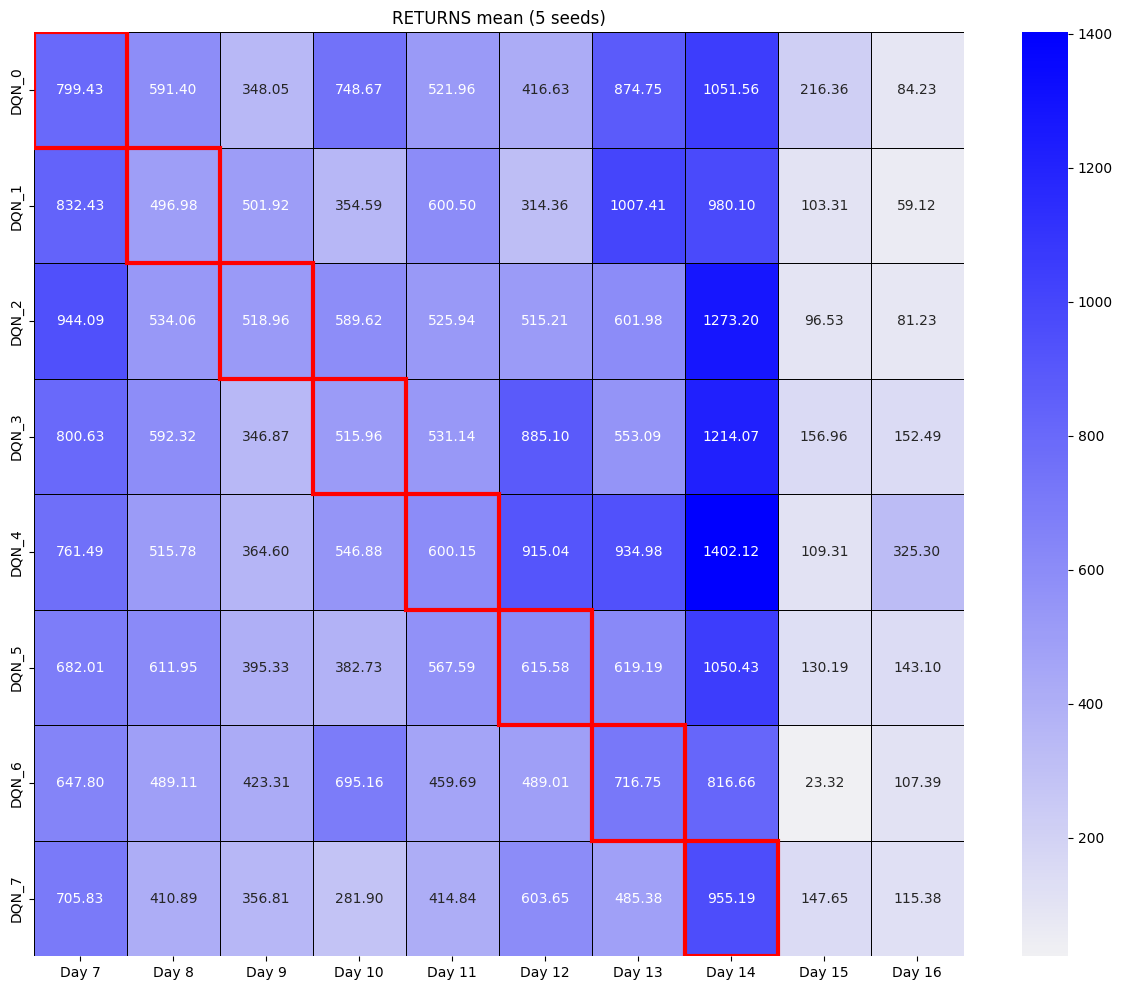

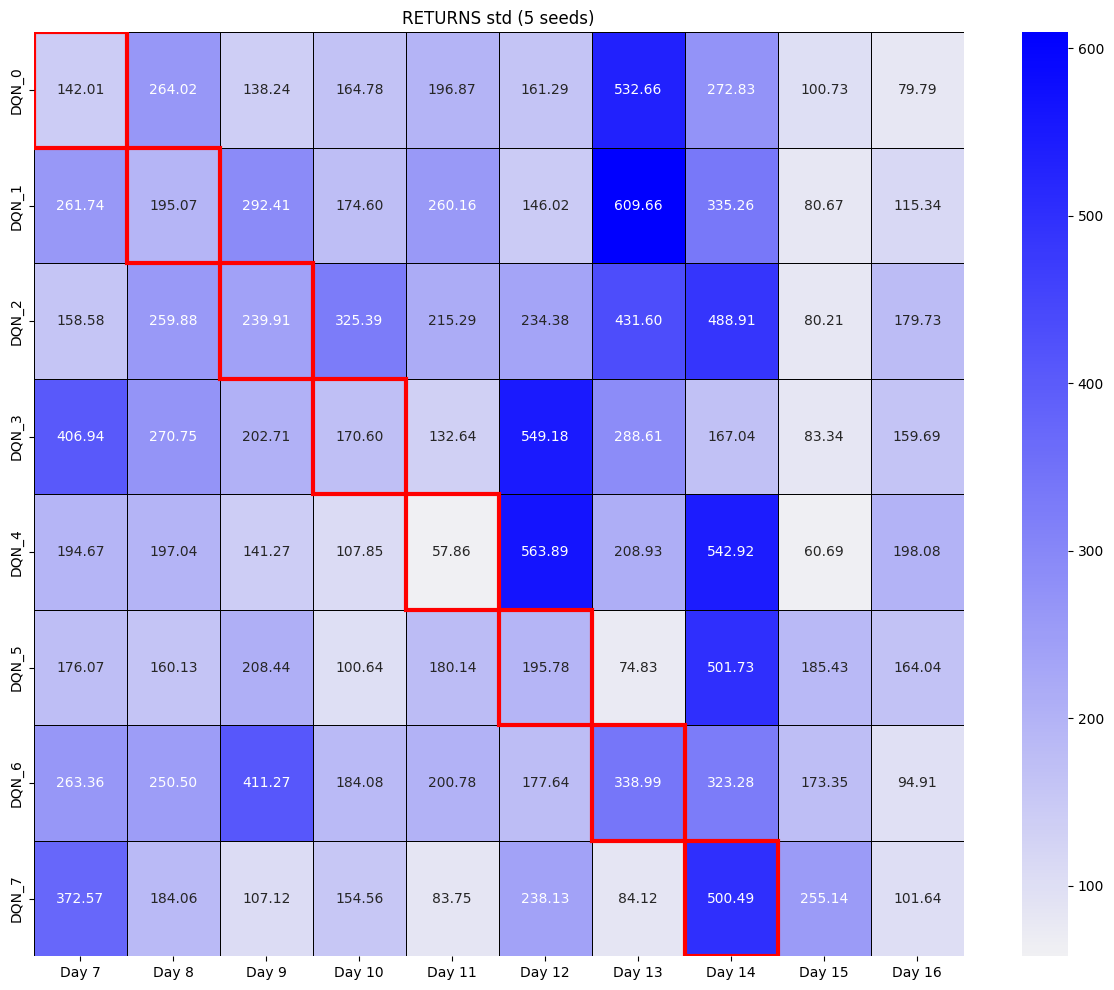

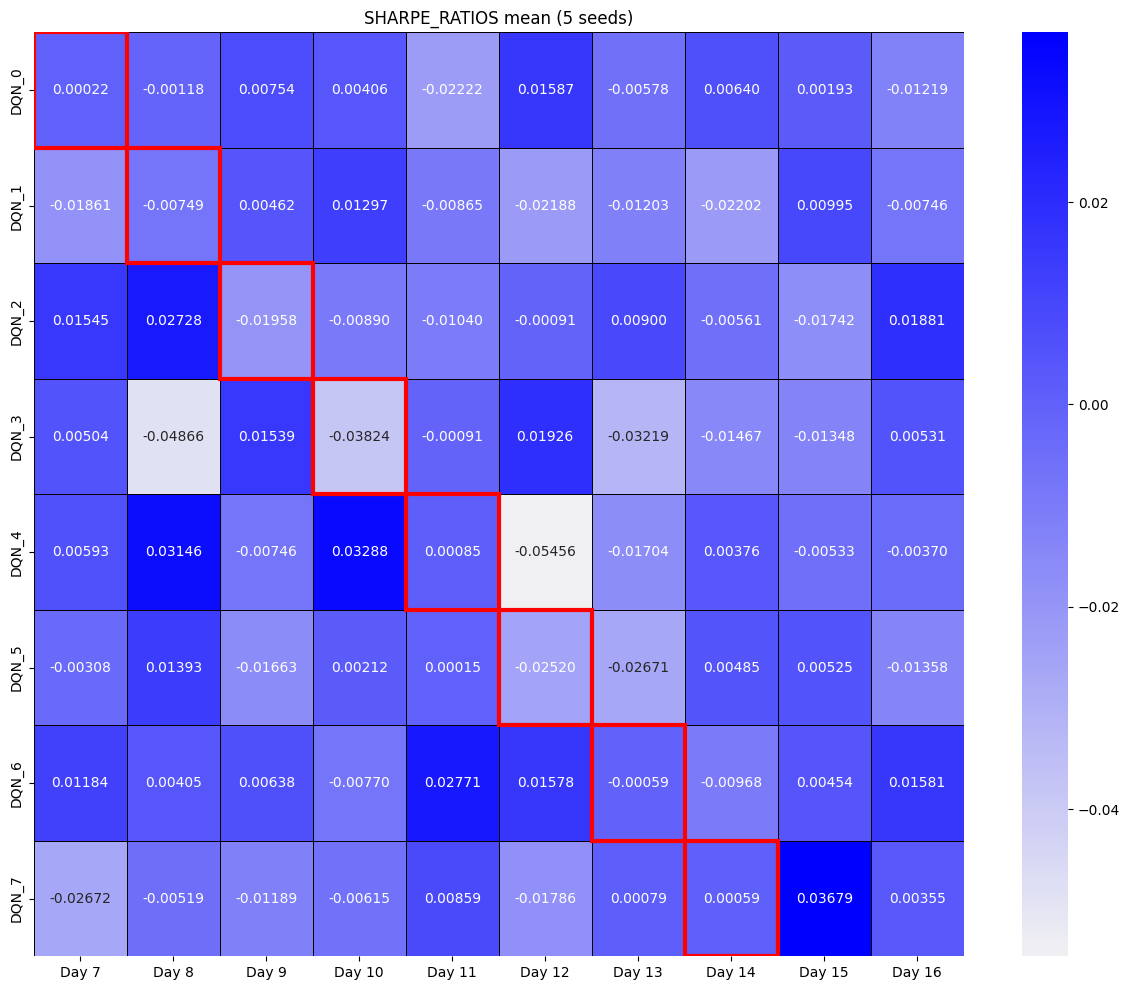

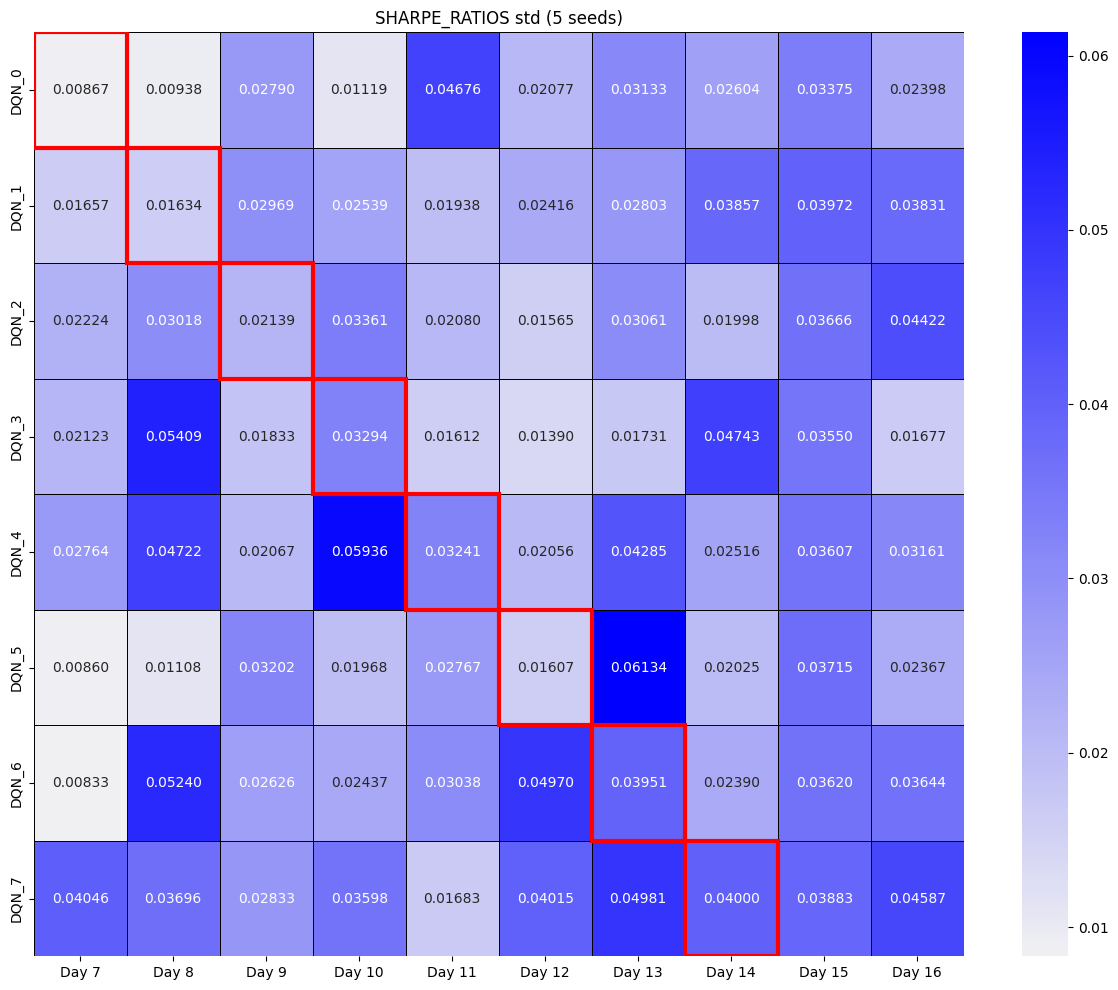

In [ ]:
from pathlib import Path
from config import EXP_DIR
from train_online_rl import plot_heatmap

first_day = 7
agents = sorted(['PPO', 'DQN'])
# agents = ['DQN']

windows = list(range(0, 8))

metrics = ["returns", "sharpe_ratios"]

results_path  = EXP_DIR / "tuning" / "completed" / "results"

save_path = results_path / "plots" / "_".join(agents)
save_path.mkdir(parents=True, exist_ok=True)

for metric in metrics: 
    means = []
    stds = []
    yticklabels = []
    training_days = []
    
    decimal_places, use_e_notation = (2, False) if metric == "returns" else (5, False)
    for window in windows:
        for agent in agents:
            if not (results_path / f"{metric}_{agent}_window_{window}.pkl").exists():
                continue
            with open(results_path / f"{metric}_{agent}_window_{window}.pkl", 'rb') as f:
                tmp = pickle.load(f)

            mean, std = tmp['mean'], tmp['std']
            means.append(mean)
            stds.append(std)
            yticklabels.append(f"{agent}_{window}")
            training_days.append([(window, window)])

    means = np.array(means)
    stds = np.array(stds)
    xticklabels = [f'Day {i+first_day}' for i in range(means.shape[1])] 

    plot_heatmap(means, training_days=training_days, xticklabels=xticklabels, yticklabels=yticklabels, 
                decimal_places=decimal_places, use_e_notation=use_e_notation, title=f"{metric.upper()} mean (5 seeds)", 
                save_path=save_path / f'{metric}_mean.png' if save_path is not None else None, force_show=True)
    plot_heatmap(stds, training_days=training_days, xticklabels=xticklabels, yticklabels=yticklabels, 
                decimal_places=decimal_places, use_e_notation=use_e_notation, title=f"{metric.upper()} std (5 seeds)", 
                save_path=save_path / f'{metric}_std.png' if save_path is not None else None, force_show=True)
